In [1]:
import json, glob, pycm, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from operator import itemgetter
from IPython.display import display, Markdown

In [2]:
def experiment_df(experiments):
    df = pd.DataFrame.from_records([ 
    { 
        "name": experiment["concept"]['label'], 
        "kappa": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa,
        "SOA9": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).SOA9,
        "ACC": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Overall_ACC,
        "FP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FP["positive"],
        "FN": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).FN["positive"],
        "POP": pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).POP["positive"],
        "experiment": experiment,
    }
    for experiment in experiments if pycm.ConfusionMatrix(matrix=experiment["confusion_matrix"]).Kappa != 'None' ]).sort_values("kappa", ascending=False)
    return df

In [3]:
# wd_v1 = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('wd_experiments/*/gpt-4*') ])
# wd_v2 = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('wd_experiments_v2/*/gpt-4*') ])
# caligraph = experiment_df([ json.load(open(file, 'r')) for file in glob.glob('caligraph_experiments/*/gpt-4*') ])
wd_v6 = experiment_df(json.load(open('wd_gpt-4_label_results.json')))
wd_v4 = experiment_df(json.load(open('wd_gpt-4_serialization_from_wikidata_results.json')))
caligraph_v2 = experiment_df(json.load(open('caligraph_gpt-4_label_results.json')))
caligraph_v3 = experiment_df(json.load(open('caligraph_gpt-4_serialization_results.json')))
caligraph_v4 = experiment_df(json.load(open('caligraph_gpt-3.5-turbo_serialization_results.json')))

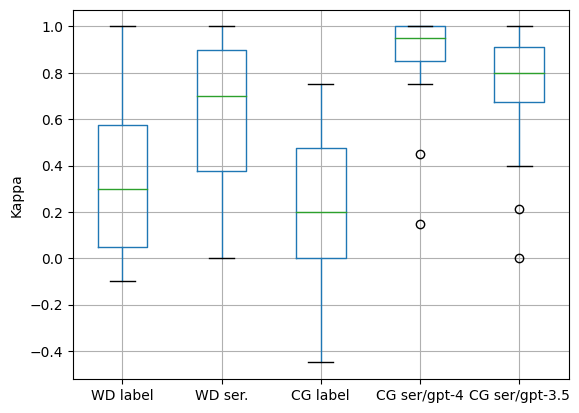

In [11]:
df = pd.concat([wd_v6["kappa"], wd_v4["kappa"], caligraph_v2["kappa"], caligraph_v3["kappa"], caligraph_v4["kappa"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["WD label", "WD ser.", "CG label", "CG ser/gpt-4", "CG ser/gpt-3.5"], axis=1)
plot = df.boxplot(return_type='axes')
plot.set_ylabel('Kappa')
plt.show(plot)

In [5]:
df.mean()

Wikidata label            0.362500
Wikidata ser.             0.645000
CaLiGraph label           0.233557
CaLiGraph ser. gpt-4      0.870898
CaLiGraph ser. gpt-3.5    0.738044
dtype: float64

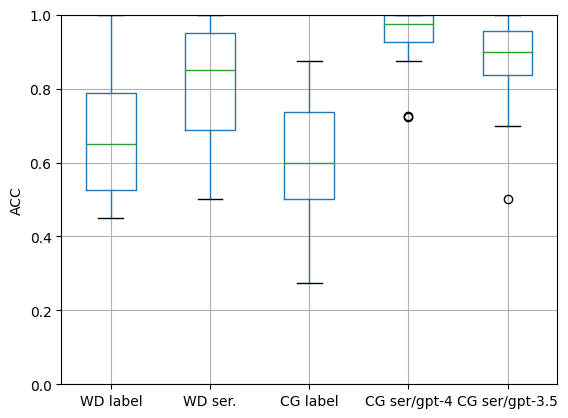

In [10]:
df = pd.concat([wd_v6["ACC"], wd_v4["ACC"], caligraph_v2["ACC"], caligraph_v3["ACC"], caligraph_v4["ACC"]], axis=1, ignore_index=True)
df.reset_index()
df = df.set_axis(["WD label", "WD ser.", "CG label", "CG ser/gpt-4", "CG ser/gpt-3.5"], axis=1)
ax = df.boxplot(return_type='axes')
ax.set_ylabel('ACC')
ax.set_ylim(0.0, 1.0)
plt.show(plot)

In [7]:
df.mean()

Wikidata label            0.681250
Wikidata ser.             0.822500
CaLiGraph label           0.611767
CaLiGraph ser. gpt-4      0.943376
CaLiGraph ser. gpt-3.5    0.874957
dtype: float64